In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [2]:
# Parameters
Lx, Lz = 40,1
Nx, Nz = 1280, 32
Ra_M = 1.0e6
M_0 = 0
M_H = -1


Prandtl = 0.7
stop_sim_time = 2000

nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)

In [3]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5']


In [4]:
"""
TOTAL KE
"""

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke.append(np.sum(tot_ke[t]))
print(all_tot_ke[:10])
print(max(all_tot_ke))
"""
mean KE
"""
all_mean_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke.append(np.average(mean_ke[t]))

[0.0, 1.352998548533294e-08, 3.228905420206756e-08, 7.229727857526596e-08, 1.8381411083713358e-07, 6.102601466286555e-07, 1.9452126005537075e-06, 6.510349497305449e-06, 2.2424072293486905e-05, 9.222161531912181e-05]
0.48826477369610477


2000
2000


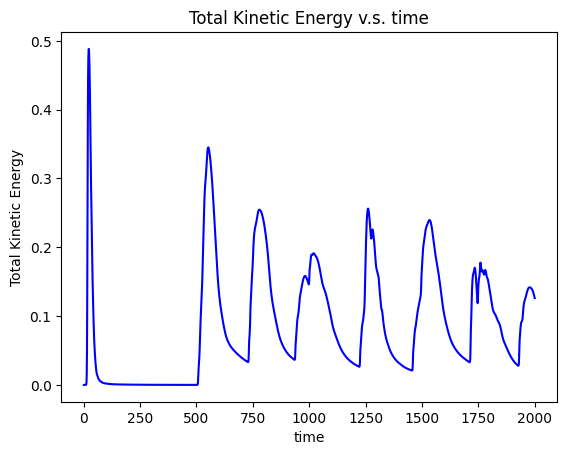

/state/partition1/job-46192477/ipykernel_124604/3757860695.py:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')


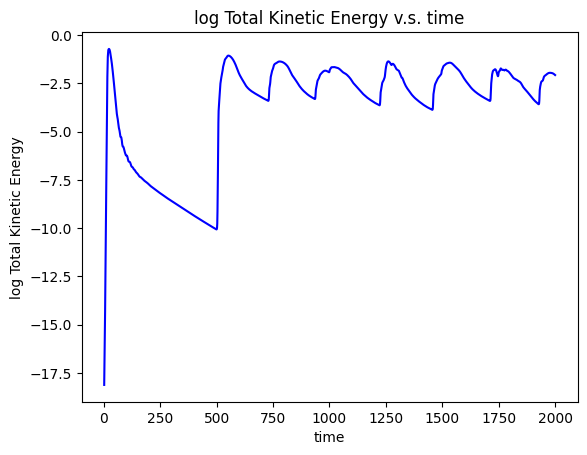

2000
2000


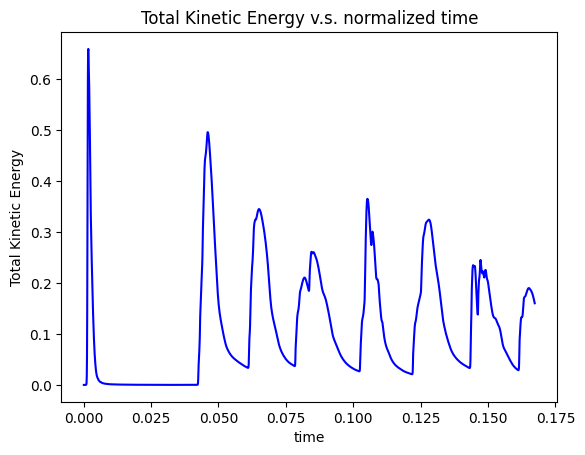

/state/partition1/job-46192477/ipykernel_124604/3757860695.py:29: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')


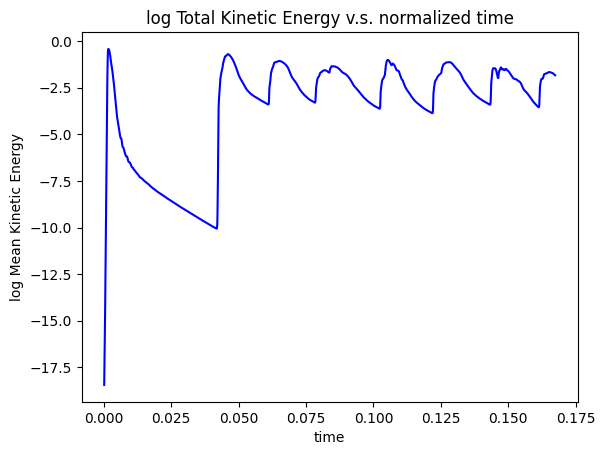

In [5]:
print(len(all_tot_ke))
#figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_ke)+1)])
figure_x_axis = np.array([x for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. time')
plt.show()
plt.clf()

plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. time')
plt.savefig("left_KE")
plt.show()
plt.clf()
print(len(all_mean_ke))

figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_mean_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_mean_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Mean Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. normalized time')
plt.show()

In [6]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy.append(uy_each)
print(all_tot_uy[3])
all_tot_ux = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux = file['tasks']['tot ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux_each = ux[t][0][0]
            all_tot_ux.append(ux_each)
print(all_tot_ux[3])
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['tot uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz_each = uz[t][0][0]
            all_tot_uz.append(uz_each)
print(all_tot_uz[3])

"""
trying to use Fourier series to approximate
"""


# Generate sample data (replace this with your dataset)
# first 500 second approximation for uy
uy_for_approx_500 = np.array(all_tot_uy)[:5000]
time_500 = np.array([x/10 for x in range(1, len(uy_for_approx_500)+1)])
matrix_A_500 = np.vstack([np.ones(len(uy_for_approx_500)), np.cos(0.06 * time_500), np.sin(0.06 * time_500)]).T
regression_uy_500 = uy_for_approx_500[:, np.newaxis]
alpha_for_uy_500 = np.linalg.lstsq(matrix_A_500, regression_uy_500, rcond=None)[0]
print(alpha_for_uy_500)

# time after 500 second approximation for uy
uy_for_approx_after = np.array(all_tot_uy)[5000:]
time_after = np.array([x/10 for x in range(1, len(uy_for_approx_after)+1)])
matrix_A_after = np.vstack([np.ones(len(uy_for_approx_after)), np.cos(0.05 * time_after), np.sin(0.05 * time_after)]).T
regression_uy_after = uy_for_approx_after[:, np.newaxis]
alpha_for_uy_after = np.linalg.lstsq(matrix_A_after, regression_uy_after, rcond=None)[0]
print(alpha_for_uy_after)

# first 500 second approximation for ux
ux_for_approx_500 = np.array(all_tot_ux)[:5000]
matrix_A_500 = np.vstack([np.ones(len(ux_for_approx_500)), np.cos(0.06 * time_500), np.sin(0.06 * time_500)]).T
regression_ux_500 = ux_for_approx_500[:, np.newaxis]
alpha_for_ux_500 = np.linalg.lstsq(matrix_A_500, regression_ux_500, rcond=None)[0]
print(alpha_for_ux_500)

# time after 500 second approximation for ux
ux_for_approx_after = np.array(all_tot_ux)[5000:]
matrix_A_after = np.vstack([np.ones(len(ux_for_approx_after)), np.cos(0.05 * time_after), np.sin(0.05 * time_after)]).T
regression_ux_after = ux_for_approx_after[:, np.newaxis]
alpha_for_ux_after = np.linalg.lstsq(matrix_A_after, regression_ux_after, rcond=None)[0]
print(alpha_for_ux_after)

9.341418906002053e-12
-7.890706691946532e-11
-6.278638492174313e-17
[[ 0.00075037]
 [ 0.00034171]
 [-0.00035338]]
[[0.]
 [0.]
 [0.]]
[[ 4.48152195e-04]
 [ 2.87045163e-05]
 [-3.49551481e-04]]
[[0.]
 [0.]
 [0.]]


2000
1000


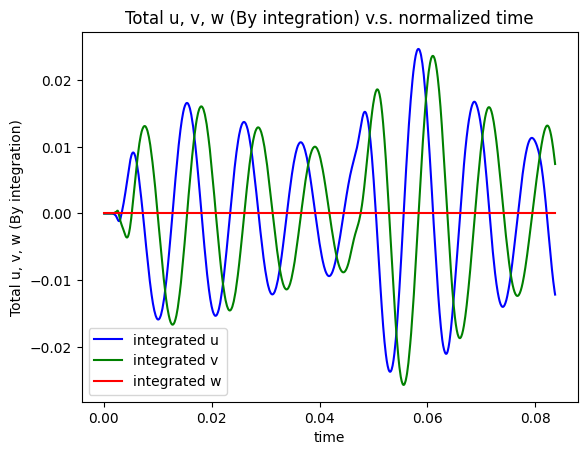

2000
1000


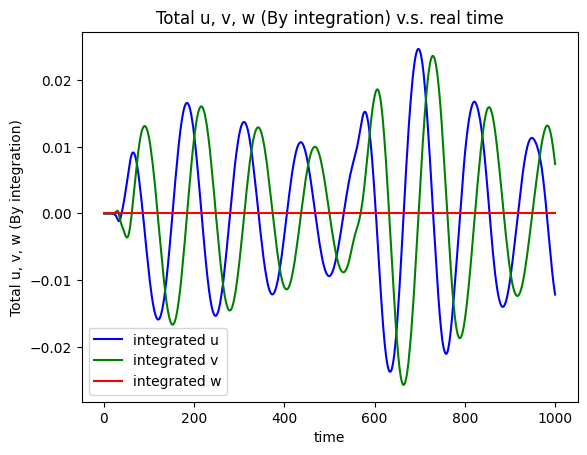

ValueError: x and y must have same first dimension, but have shapes (1000,) and (2000,)

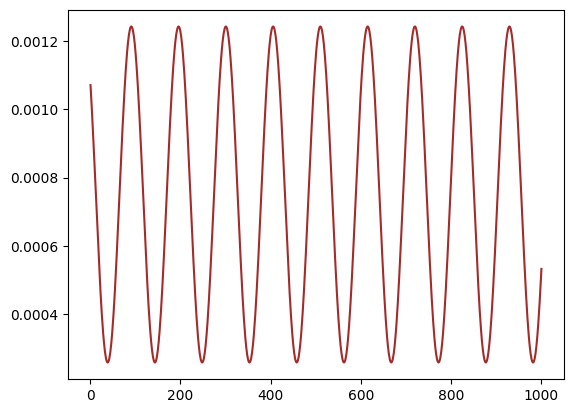

In [7]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_uy)+1)])[:1000]
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy[:1000], color = 'blue', label='integrated u')
plt.plot(figure_x_axis, all_tot_ux[:1000], color = 'green', label='integrated v')
plt.plot(figure_x_axis, all_tot_uz[:1000], color = 'red', label='integrated w')
plt.xlabel('time')
plt.ylabel('Total u, v, w (By integration)')
plt.title('Total u, v, w (By integration) v.s. normalized time')
plt.legend()
plt.show()
plt.clf()
"""
I suspect that, because it is integrated, then total uz is always 0
"""

print(len(all_tot_uy))
time_x_axis = np.array([x for x in range(1, len(all_tot_uy)+1)])[:1000]
print(len(figure_x_axis))
plt.plot(time_x_axis, all_tot_uy[:1000], color = 'blue', label='integrated u')
plt.plot(time_x_axis, all_tot_ux[:1000], color = 'green', label='integrated v')
plt.plot(time_x_axis, all_tot_uz[:1000], color = 'red', label='integrated w')
plt.xlabel('time')
plt.ylabel('Total u, v, w (By integration)')
plt.title('Total u, v, w (By integration) v.s. real time')
plt.legend()
plt.savefig("poster_uvw")
plt.show()
plt.clf()

approx_time_500 = time_x_axis[:5000]
approx_time_after = time_x_axis[5000:]
approx_uy_500 = alpha_for_uy_500[0]+alpha_for_uy_500[1]*np.cos(0.06* approx_time_500)+alpha_for_uy_500[2]*np.sin(0.06 * approx_time_500)
approx_uy_after = alpha_for_uy_after[0]+alpha_for_uy_after[1]*np.cos(0.05* approx_time_after)+alpha_for_uy_after[2]*np.sin(0.05 * approx_time_after)
approximation_uy = np.concatenate((approx_uy_500, approx_uy_after))


plt.plot(time_x_axis, approximation_uy,color = 'brown', label='Fourier uy')
plt.plot(time_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.title('Total Uy and fourier approximaion')
plt.legend()
plt.show()
plt.clf()


approx_ux_500 = alpha_for_ux_500[0]+alpha_for_ux_500[1]*np.cos(0.06* approx_time_500)+alpha_for_ux_500[2]*np.sin(0.06 * approx_time_500)
approx_ux_after = alpha_for_ux_after[0]+alpha_for_ux_after[1]*np.cos(0.05* approx_time_after)+alpha_for_ux_after[2]*np.sin(0.05 * approx_time_after)
approximation_ux = np.concatenate((approx_ux_500, approx_ux_after))


plt.plot(time_x_axis, approximation_ux,color = 'brown', label='Fourier ux')
plt.plot(time_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.title('Total Uy and fourier approximaion')
plt.legend()
plt.show()
plt.clf()

In [8]:
all_tot_uy2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy2 = file['tasks']['ke by uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy2_each = uy2[t][0][0]
            all_tot_uy2.append(uy2_each)
print(all_tot_uy2[3])
all_tot_ux2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux2 = file['tasks']['ke by ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux2_each = ux2[t][0][0]
            all_tot_ux2.append(ux2_each)
print(all_tot_ux2[3])
all_tot_uz2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz2 = file['tasks']['ke by uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz2_each = uz2[t][0][0]
            all_tot_uz2.append(uz2_each)
print(all_tot_uz2[3])

7.253986092372377e-11
1.6731469885255875e-08
5.549326882908636e-08


2000
2000


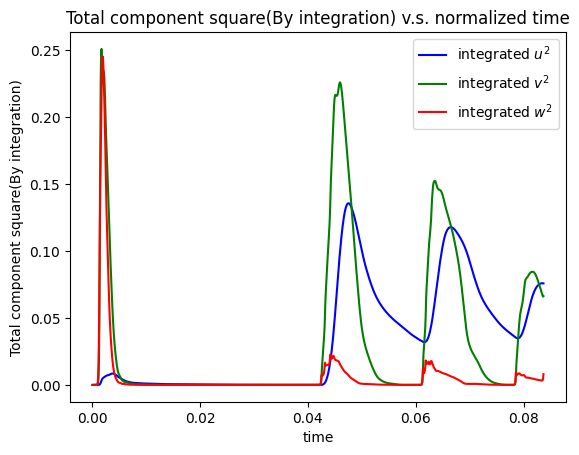

In [10]:
print(len(all_tot_uy2))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_uy2)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis[:1000], all_tot_uy2[:1000], color = 'blue', label='integrated $u^2$')
plt.plot(figure_x_axis[:1000], all_tot_ux2[:1000], color = 'green', label='integrated $v^2$')
plt.plot(figure_x_axis[:1000], all_tot_uz2[:1000], color = 'red', label='integrated $w^2$')
plt.xlabel('time')
plt.ylabel('Total component square(By integration)')
plt.title('Total component square(By integration) v.s. normalized time')
plt.legend()
plt.savefig("uvw_square")
plt.show()

In [10]:
"""
ANOTHER DEBUGGING CONTROL GROUP
"""
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))

all_ux_at_600_15 = []
all_uy_at_600_15 = []
all_ux_at_300_15 = []
all_uy_at_300_15 = []
all_ux_at_300_30 = []
all_uy_at_300_30 = []

for file_path in file_paths:
    with h5py.File(file_path, mode='r') as file:
        u = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        
        indices = [(600, 15), (300, 15), (300, 30)]
        
        for t in range(len(simtime)):
            for idx in indices:
                each_ux = u[t][0][idx[0]][idx[1]]
                each_uy = u[t][1][idx[0]][idx[1]]
                
                if idx == (600, 15):
                    all_ux_at_600_15.append(each_ux)
                    all_uy_at_600_15.append(each_uy)
                elif idx == (300, 15):
                    all_ux_at_300_15.append(each_ux)
                    all_uy_at_300_15.append(each_uy)
                elif idx == (300, 30):
                    all_ux_at_300_30.append(each_ux)
                    all_uy_at_300_30.append(each_uy)
        if len(all_ux_at_600_15) % 500 == 0:
            print(len(all_ux_at_600_15))
print(len(all_ux_at_600_15), len(all_uy_at_600_15))

x_axis = np.array([x/4 for x in range(1, len(all_ux_at_600_15)+1)])
print(len(x_axis))


1000
2000
2000 2000
2000


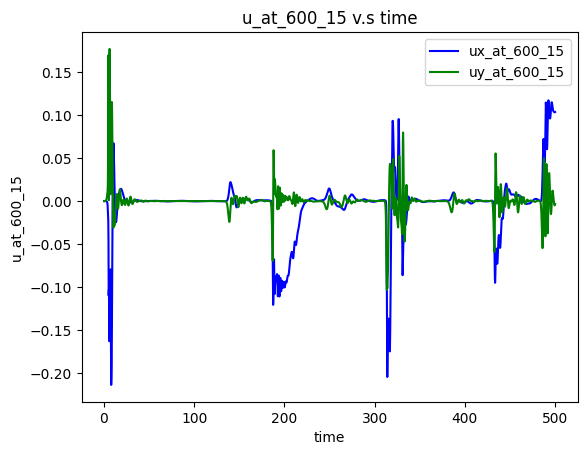

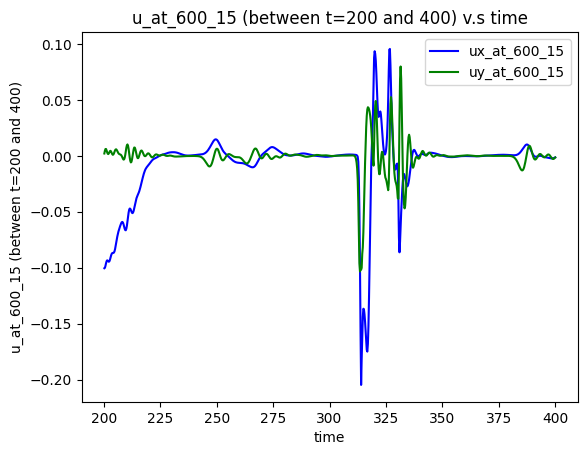

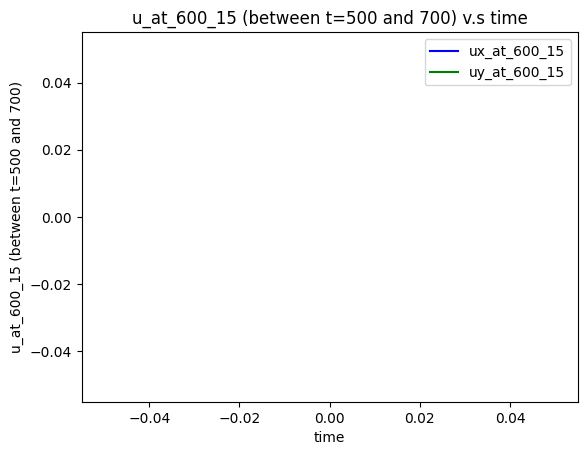

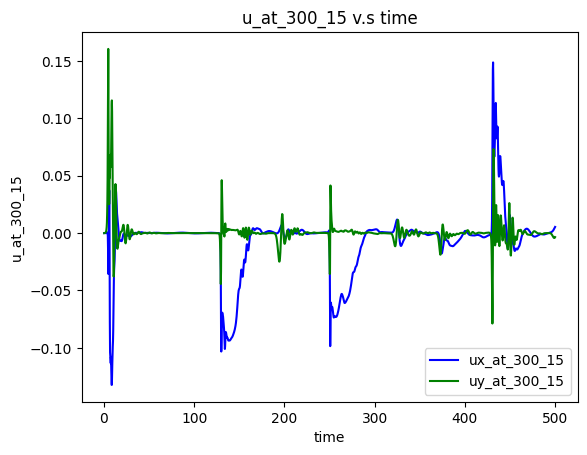

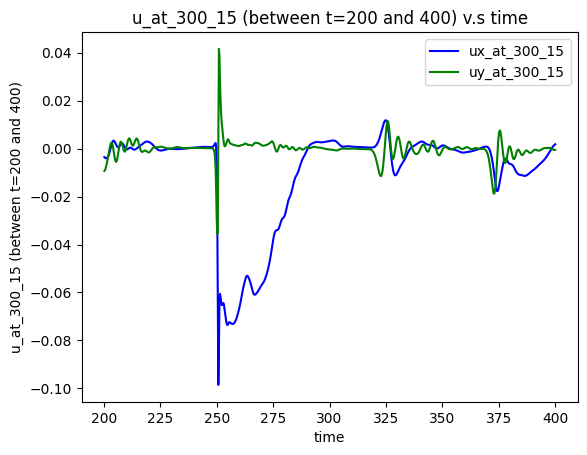

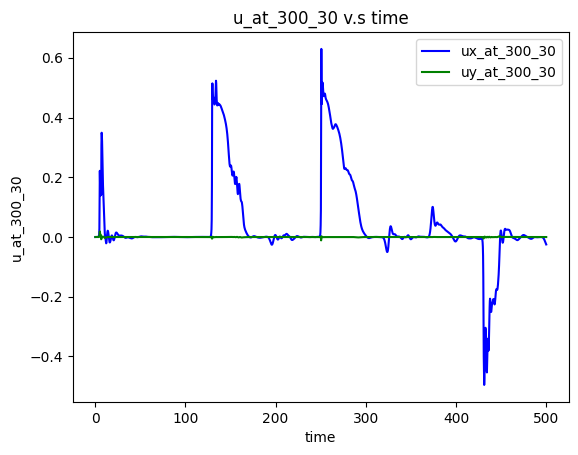

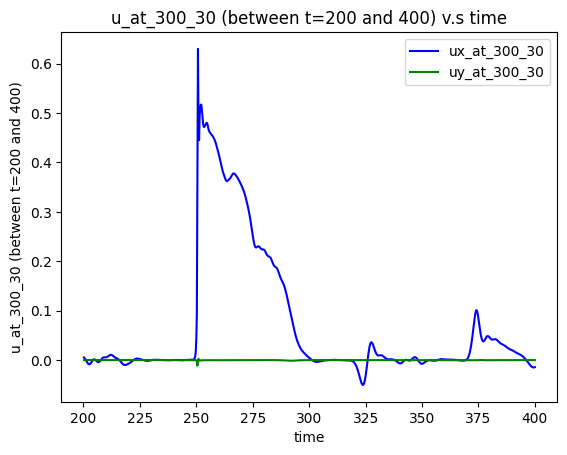

<Figure size 640x480 with 0 Axes>

In [11]:
"""
point (600, 15)
"""
plt.plot(x_axis, all_ux_at_600_15, color = 'blue', label='ux_at_600_15')
plt.plot(x_axis, all_uy_at_600_15, color = 'green', label='uy_at_600_15')
plt.xlabel('time')
plt.ylabel('u_at_600_15')
plt.title('u_at_600_15 v.s time')
plt.legend()
plt.show()
plt.clf()


plt.plot(x_axis[800:1600], all_ux_at_600_15[800:1600], color = 'blue', label='ux_at_600_15')
plt.plot(x_axis[800:1600], all_uy_at_600_15[800:1600], color = 'green', label='uy_at_600_15')
plt.xlabel('time')
plt.ylabel('u_at_600_15 (between t=200 and 400)')
plt.title('u_at_600_15 (between t=200 and 400) v.s time')
plt.legend()
plt.show()
plt.clf()

plt.plot(x_axis[2000:2800], all_ux_at_600_15[2000:2800], color = 'blue', label='ux_at_600_15')
plt.plot(x_axis[2000:2800], all_uy_at_600_15[2000:2800], color = 'green', label='uy_at_600_15')
plt.xlabel('time')
plt.ylabel('u_at_600_15 (between t=500 and 700)')
plt.title('u_at_600_15 (between t=500 and 700) v.s time')
plt.legend()
plt.show()
plt.clf()

"""
point (300, 15)
"""
plt.plot(x_axis, all_ux_at_300_15, color = 'blue', label='ux_at_300_15')
plt.plot(x_axis, all_uy_at_300_15, color = 'green', label='uy_at_300_15')
plt.xlabel('time')
plt.ylabel('u_at_300_15')
plt.title('u_at_300_15 v.s time')
plt.legend()
plt.show()
plt.clf()

plt.plot(x_axis[800:1600], all_ux_at_300_15[800:1600], color = 'blue', label='ux_at_300_15')
plt.plot(x_axis[800:1600], all_uy_at_300_15[800:1600], color = 'green', label='uy_at_300_15')
plt.xlabel('time')
plt.ylabel('u_at_300_15 (between t=200 and 400)')
plt.title('u_at_300_15 (between t=200 and 400) v.s time')
plt.legend()
plt.show()
plt.clf()


"""
at point (300, 30)
"""
plt.plot(x_axis, all_ux_at_300_30, color = 'blue', label='ux_at_300_30')
plt.plot(x_axis, all_uy_at_300_30, color = 'green', label='uy_at_300_30')
plt.xlabel('time')
plt.ylabel('u_at_300_30')
plt.title('u_at_300_30 v.s time')
plt.legend()
plt.show()
plt.clf()

plt.plot(x_axis[800:1600], all_ux_at_300_30[800:1600], color = 'blue', label='ux_at_300_30')
plt.plot(x_axis[800:1600], all_uy_at_300_30[800:1600], color = 'green', label='uy_at_300_30')
plt.xlabel('time')
plt.ylabel('u_at_300_30 (between t=200 and 400)')
plt.title('u_at_300_30 (between t=200 and 400) v.s time')
plt.legend()
plt.show()
plt.clf()

In [12]:
taskname = "uy"
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)
recorded = False
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        if recorded == False:
            max_level_old = np.max(file['tasks'][f'{taskname}'])
            min_level_old = np.min(file['tasks'][f'{taskname}'])
            recorded = True
        else:
            max_level_new = np.max(file['tasks'][f'{taskname}'])
            min_level_new = np.min(file['tasks'][f'{taskname}'])
            if max_level_new > max_level_old:
                max_level_old = max_level_new
            if min_level_new < min_level_old:
                min_level_old = min_level_new
min_lev, max_lev = min_level_old, max_level_old
print(min_lev, max_lev)

['snapshots/snapshots_s1.h5', 'snapshots/snapshots_s2.h5']
-0.25811746162157184 0.2503058437974169
